
#Cover Page

**Developed by:**

**Mohamed Fathi - 41810059**

**Ahmed Saber - 41810077**

#Import the dataset from drive

In [ ]:
!gdown --id 1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld

Downloading...
From: https://drive.google.com/uc?id=1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld
To: /content/seeds.csv
100% 9.12k/9.12k [00:00<00:00, 14.1MB/s]


#Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# show how the data looks like

In [ ]:
data = pd.read_csv('seeds.csv')
data.head(5)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Check if all data are numbers and if there is a relations between the data


In [ ]:
data.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [ ]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

#Heatmap

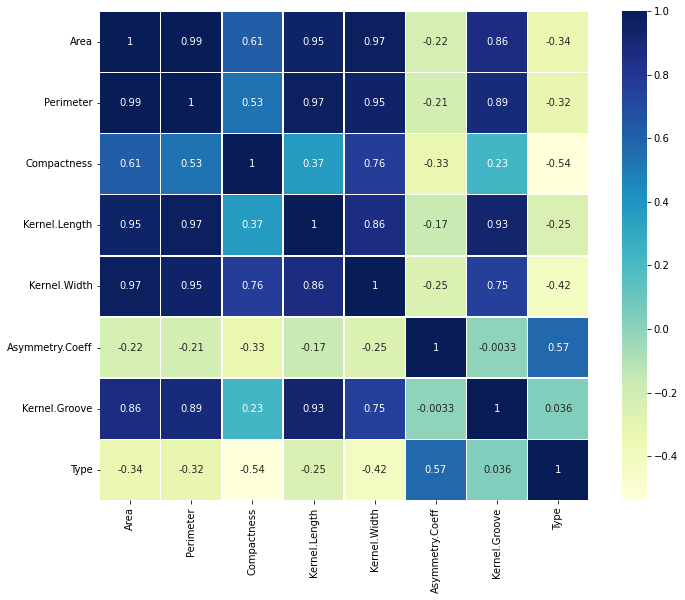

In [ ]:
x,y = plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(),cmap='YlGnBu',square=True,linewidth=.5,annot=True)
plt.show()

# Check for the null 

In [ ]:
data.isna().any()
data.isnull().sum()
data.dropna()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


# show mean, max , min so handle the data if there is a gap between 75% and max  

In [ ]:
data.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


# check for the outlier

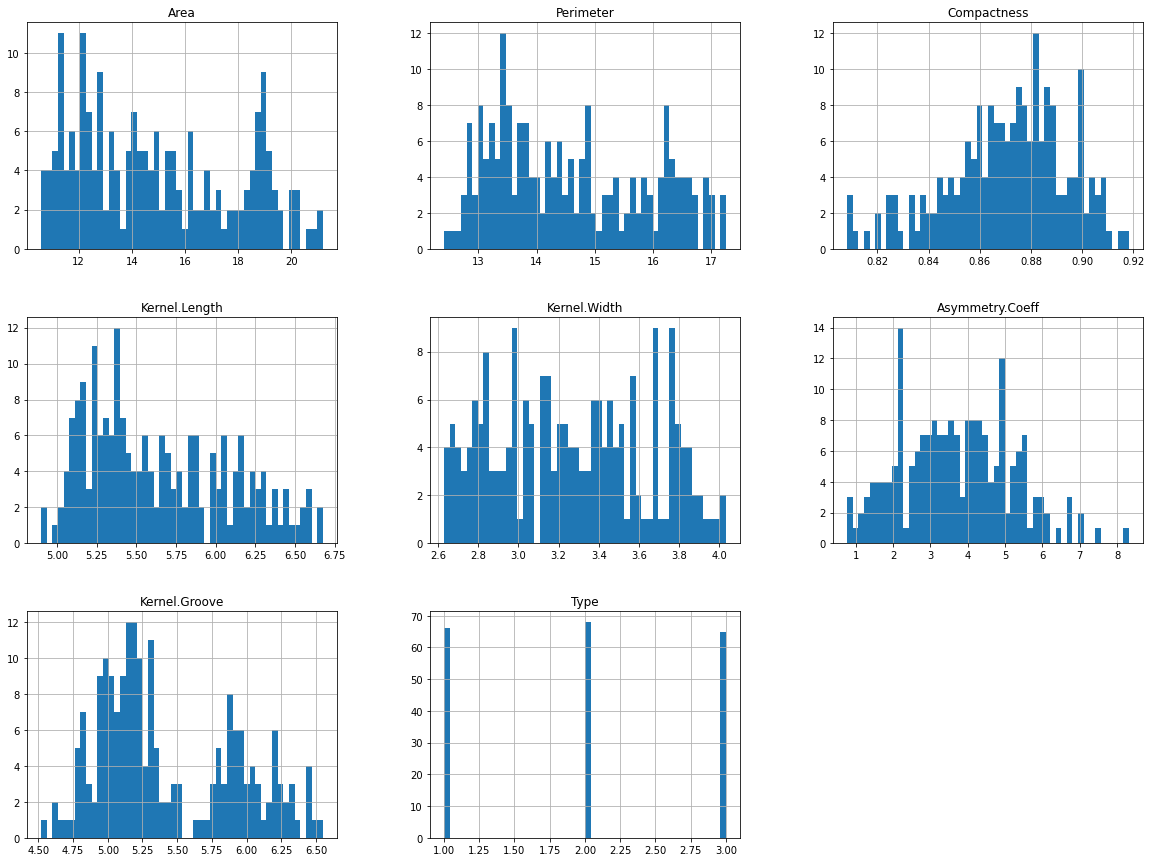

In [ ]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
data.shape

(199, 8)

**drop the outlier**

In [ ]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# print (IQR)
# data = data[~((data < (Q1 - 1.5 *  IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
# print (data.shape)

In [ ]:
# data.hist(bins=50,figsize=(20,15))
# plt.show()

#Normalization

In [ ]:
df = data.drop('Type', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, data.Type), 1)
df_norm.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.192837,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.033497,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.256149,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.197870,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.078133,0.322994,1


#Start Split the data and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop('Type', axis=1), df_norm['Type'], test_size = 0.20)
print(len(X_train), "train +", len(X_test), "valid")

159 train + 40 valid


**Using KNN ( k-nearest neighbors ) for trainning** 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 1,  0, 11]])

Text(33.0, 0.5, 'Truth')

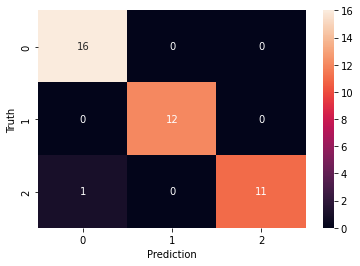

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Accuracy** 

In [ ]:
var="%"
print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100), var[0])

Accuracy: 97.5 %


#find the mean square error

In [ ]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.31622776601683794

In [ ]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.05